In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# import the covid date csv & clean
covid_df= pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv',thousands=',', parse_dates=[0])
covid_df.drop(['consent_cases', 'consent_deaths', 'created_at', 'conf_cases','prob_cases', 'conf_death','pnew_case','prob_death', 'pnew_death'], axis= 1, inplace = True)
covid_df.rename(columns={'submission_date':'Submission Date','state':'State','tot_cases':'Total Cases','new_case':'Daily New Cases','tot_death':'Total Deaths','new_death': 'Daily New Deaths'}, inplace = True)

covid_df.sort_values(['State','Submission Date'])

,Submission Date,State,Total Cases,Daily New Cases,Total Deaths,Daily New Deaths
3599,2020-01-22,AK,0,0,0,0
28030,2020-01-23,AK,0,0,0,0
29871,2020-01-24,AK,0,0,0,0
29941,2020-01-25,AK,0,0,0,0
32257,2020-01-26,AK,0,0,0,0
...,...,...,...,...,...,...
15653,2021-08-23,WY,71562,299,809,0
27695,2021-08-24,WY,72069,507,835,26
24804,2021-08-25,WY,72528,459,835,0
27392,2021-08-26,WY,72995,467,835,0


In [3]:
# create groupby date to aggregate data from all state to reflect federal daily data
# reset index so date can be used for plotting
covid_df_grouped_date = covid_df.groupby(['Submission Date']).sum().reset_index()
covid_df_grouped_date

,Submission Date,Total Cases,Daily New Cases,Total Deaths,Daily New Deaths
0,2020-01-22,33,33,0,0
1,2020-01-23,35,2,0,0
2,2020-01-24,36,1,0,0
3,2020-01-25,39,3,0,0
4,2020-01-26,42,3,0,0
...,...,...,...,...,...
579,2021-08-23,38037577,112020,629220,703
580,2021-08-24,38192607,154363,630408,1184
581,2021-08-25,38360956,162485,631563,1138
582,2021-08-26,38531770,170229,632786,1192


In [4]:
# generate list of sp500 indices
tickerlist = ['SPY', 'XLF', 'XLU', 'XLK', 'XLE', 'XLI',
             'XLB', 'XLP', 'XLV', 'XLY', 'XLRE', 'XLC']

In [5]:
# generate list of tickers
tickers = [yf.Ticker(tick) for tick in tickerlist]

In [6]:
# store full name of each index in list
namelist = []
for tick in tickers:
    try:
        name = tick.info['longName']
        namelist.append(name)
    except KeyError:
        namelist.append(None)
        print(f"there's no name listed for {tick}")

In [7]:
# display full names
namelist

['SPDR S&P 500 ETF Trust',
 'Financial Select Sector SPDR Fund',
 'Utilities Select Sector SPDR Fund',
 'Technology Select Sector SPDR Fund',
 'Energy Select Sector SPDR Fund',
 'Industrial Select Sector SPDR Fund',
 'Materials Select Sector SPDR Fund',
 'Consumer Staples Select Sector SPDR Fund',
 'Health Care Select Sector SPDR Fund',
 'Consumer Discretionary Select Sector SPDR Fund',
 'The Real Estate Select Sector SPDR Fund',
 'Communication Services Select Sector SPDR Fund']

In [8]:
# pull price history for each index
histlist = [tick.history('12mo') for tick in tickers]

In [9]:
# reset index for each dataframe and set date format
for df in histlist:
    df.reset_index(inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df.rename(columns={"Date":"Submission Date"},inplace = True)

In [10]:
# add columns to history dataframes
for df in histlist:
    df['Amplitude'] = df['High'] - df['Low']
    df['Daily Change'] = df['Open'] - df['Close']
    df.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

In [11]:
combo_list = []
for df in histlist:
    combo = pd.merge(df, covid_df_grouped_date, on='Submission Date', how='inner')
    combo_list.append(combo)

In [12]:
combo_list[0]

,Submission Date,Open,High,Low,Close,Volume,Amplitude,Daily Change,Total Cases,Daily New Cases,Total Deaths,Daily New Deaths
0,2020-09-03,350.647283,351.149808,337.562180,340.321106,148011100,13.587628,10.326177,6293440,45655,195948,882
1,2020-09-04,341.050201,342.725234,329.955443,337.542450,139156300,12.769791,3.507751,6343150,49710,196787,839
2,2020-09-08,331.768428,337.611422,327.994650,328.319794,114465300,9.616772,3.448634,6465327,28224,199295,619
3,2020-09-09,332.596137,337.434082,331.669930,334.803284,91462300,5.764152,-2.207146,6504424,39097,200135,840
4,2020-09-10,336.803481,337.503052,327.965123,328.989868,90569500,9.537930,7.813613,6545488,41064,200924,789
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2021-08-23,445.160004,448.230011,443.440002,447.260010,54973000,4.790009,-2.100006,38037577,112020,629220,703
244,2021-08-24,447.970001,448.540009,447.420013,447.970001,38744700,1.119995,0.000000,38192607,154363,630408,1184
245,2021-08-25,448.170013,449.459991,447.769989,448.910004,40529700,1.690002,-0.739990,38360956,162485,631563,1138
246,2021-08-26,448.609985,448.859985,446.160004,446.260010,57829600,2.699982,2.349976,38531770,170229,632786,1192


<IPython.core.display.Javascript object>


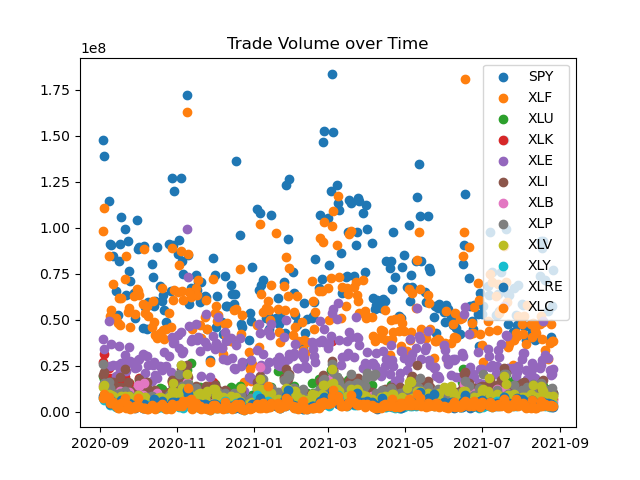

In [24]:
# test plotting with matplotlib
plt.figure()
counter =0

for df in combo_list:
    plt.scatter(df['Submission Date'], df['Volume'], label=tickerlist[counter])
    counter +=1
    
plt.title('Trade Volume over Time')
plt.legend()

<IPython.core.display.Javascript object>


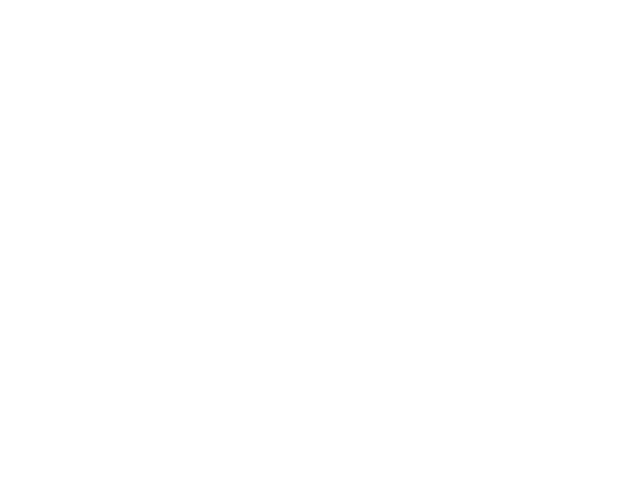

<IPython.core.display.Javascript object>


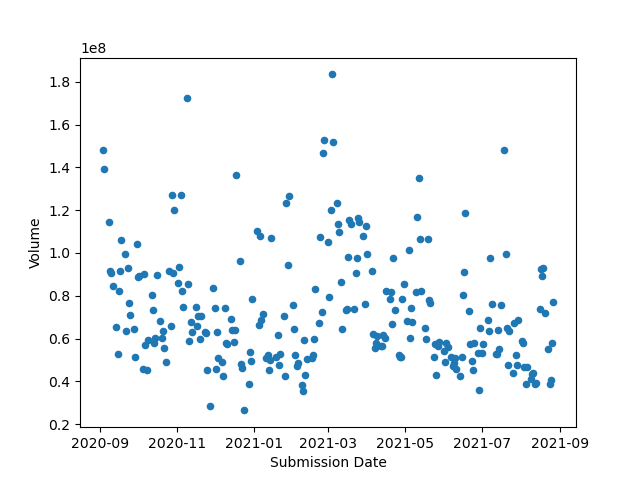

<IPython.core.display.Javascript object>


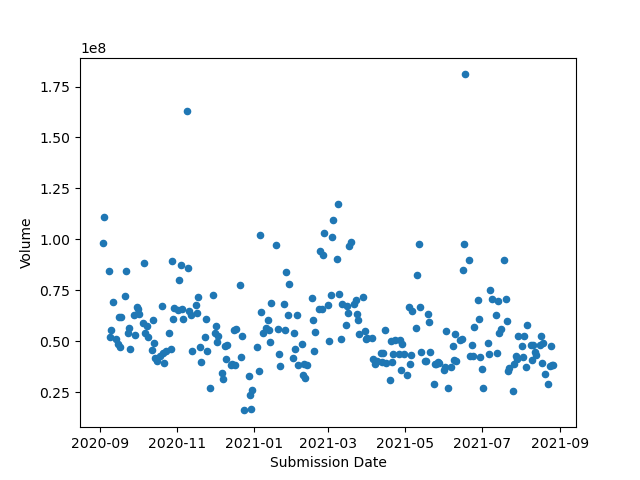

<IPython.core.display.Javascript object>


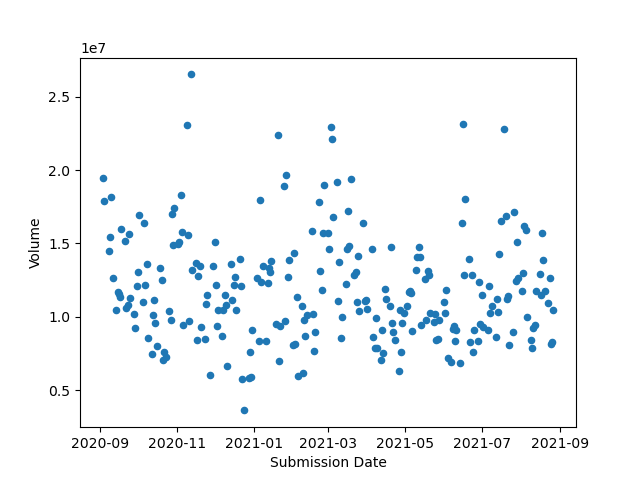

<IPython.core.display.Javascript object>


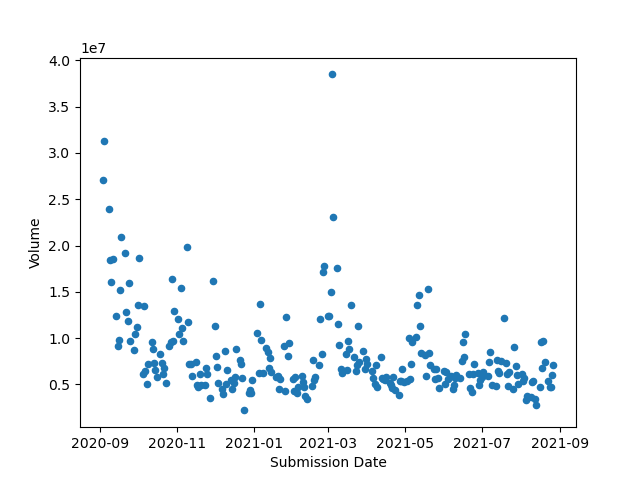

<IPython.core.display.Javascript object>


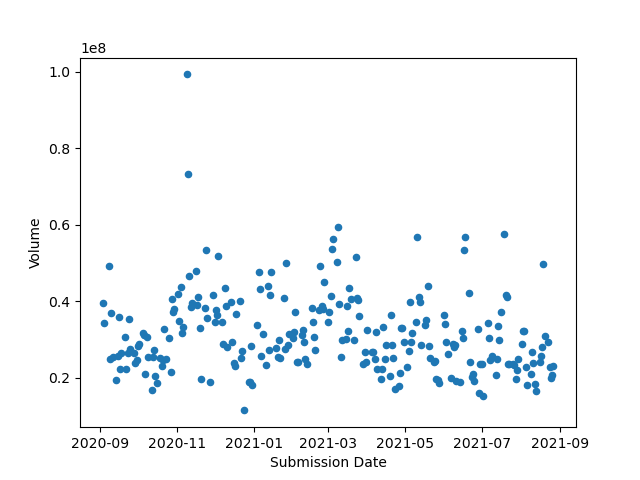

<IPython.core.display.Javascript object>


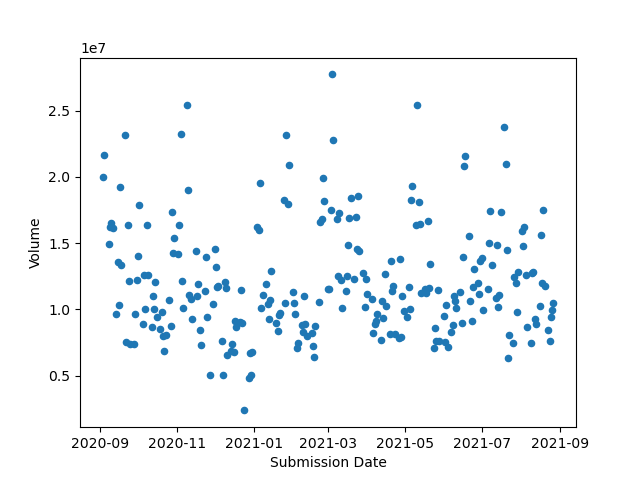

<IPython.core.display.Javascript object>


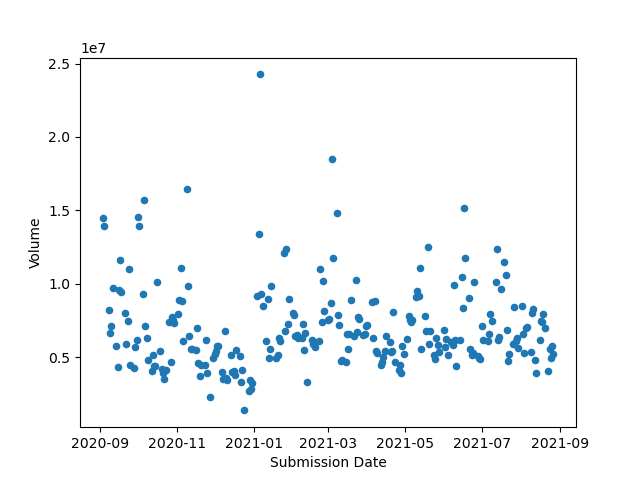

<IPython.core.display.Javascript object>


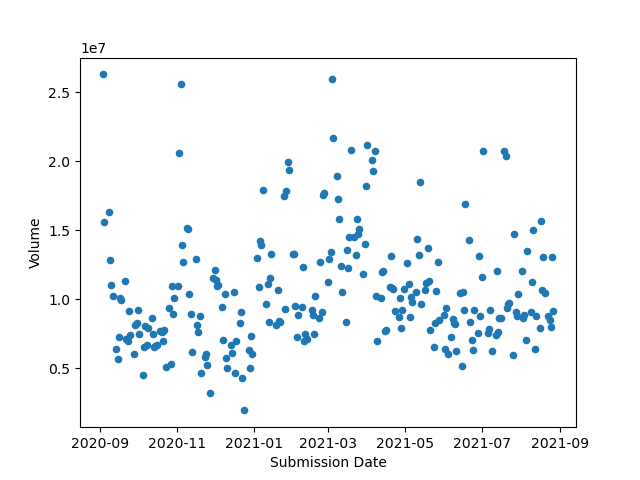

<IPython.core.display.Javascript object>


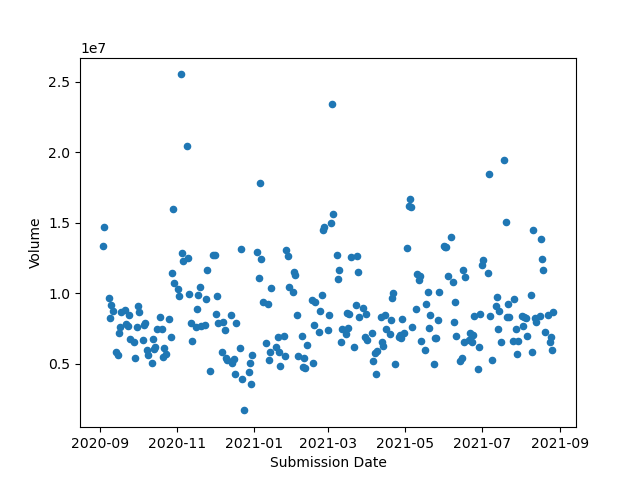

<IPython.core.display.Javascript object>


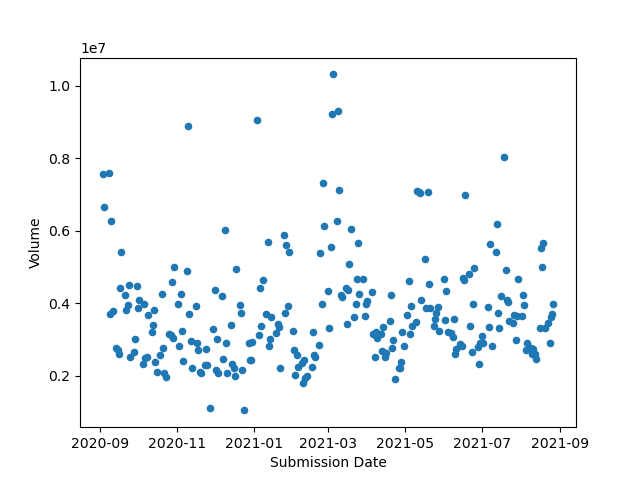

<IPython.core.display.Javascript object>


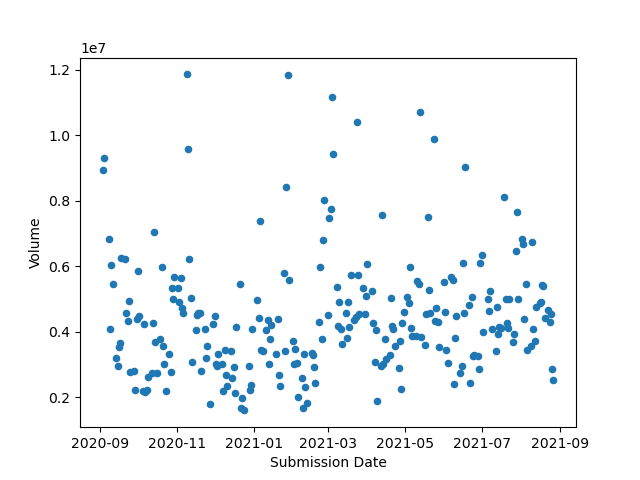

<IPython.core.display.Javascript object>


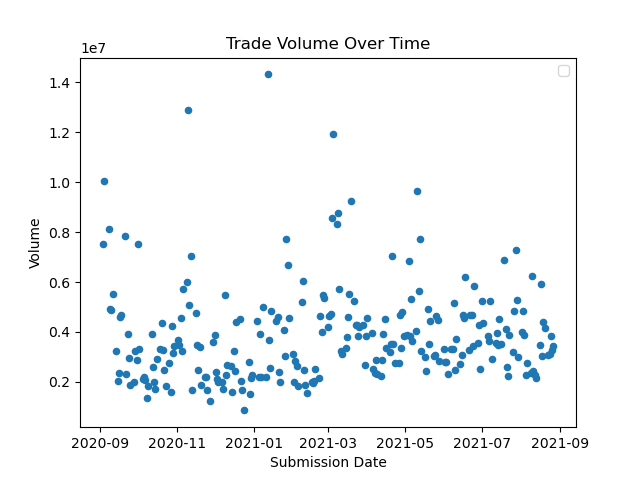

No handles with labels found to put in legend.


In [23]:
# test plotting with pandas plots
plt.figure()
axs = []

for df in combo_list:
    ax = df.plot.scatter(x='Submission Date', y='Volume')
    
plt.title('Trade Volume Over Time')
plt.legend()